In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pyomeca

markers = ["RTOE"]
m = (
pyomeca.Markers3d.from_c3d( "B0264_dollyo_air_P_T01.c3d", names=markers)
.to_dataframe(add_metadata=["get_time_frames"])
)

print(m)


          RTOE_X      RTOE_Y     RTOE_Z  get_time_frames
0    -235.466385 -284.629700  43.748245            0.000
1    -235.467529 -284.625671  43.747372            0.004
2    -235.468903 -284.620911  43.746777            0.008
3    -235.470474 -284.615356  43.746460            0.012
4    -235.472214 -284.609100  43.746403            0.016
5    -235.474030 -284.602112  43.746582            0.020
6    -235.475891 -284.594513  43.746964            0.024
7    -235.477844 -284.586456  43.747520            0.028
8    -235.479996 -284.578064  43.748207            0.032
9    -235.482346 -284.569489  43.748978            0.036
10   -235.484894 -284.560883  43.749771            0.040
11   -235.487518 -284.552277  43.750542            0.044
12   -235.490036 -284.543610  43.751289            0.048
13   -235.492294 -284.534882  43.752048            0.052
14   -235.494247 -284.525940  43.752899            0.056
15   -235.496033 -284.516724  43.753956            0.060
16   -235.497849 -284.507111  4

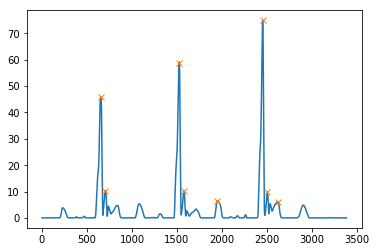

In [41]:
df = m.round(decimals = 3)
df1 = df.diff()
dfx = (df1['RTOE_X'] /1000) / df1['get_time_frames']
dfy = (df1['RTOE_Y'] /1000) / df1['get_time_frames']
dfz = (df1['RTOE_Z'] /1000) / df1['get_time_frames']
dfx1 = dfx[1:-1]**2
dfy1 = dfy[1:-1]**2
dfz1 = dfz[1:-1]**2
v = (dfx1 + dfy1 + dfz1)**1/2
peaks, _ = find_peaks(v, height=6)
plt.plot(v)
plt.plot(peaks, v[peaks], "x")
plt.show()